In [1]:
#（シャープ）以降の文字はプログラムに影響しません。
# 図やグラフを図示するためのライブラリをインポートする。
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

In [2]:
# 数値計算やデータフレーム操作に関するライブラリをインポートする
import numpy as np
import pandas as pd
from pandas.tools import plotting # 高度なプロットを行うツールのインポート

In [3]:
# URL によるリソースへのアクセスを提供するライブラリをインポートする。
# import urllib # Python 2 の場合
import urllib.request # Python 3 の場合

In [4]:
import sklearn #機械学習のライブラリ
from sklearn.decomposition import PCA #主成分分析器

In [5]:
# ウェブ上のリソースを指定する
url = 'https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/sbnote_dataJt.txt'
# 指定したURLからリソースをダウンロードし、名前をつける。
# urllib.urlretrieve(url, 'sbnote_dataJt.txt') # Python 2 の場合
urllib.request.urlretrieve(url, 'sbnote_dataJt.txt') # Python 3 の場合

('sbnote_dataJt.txt', <http.client.HTTPMessage at 0x109008828>)

In [6]:
df = pd.read_csv('ayame.txt', sep='\t', index_col=0) # データの読み込み

In [7]:
df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa
10,4.9,3.1,1.5,0.1,setosa


In [8]:
# 行列の正規化
dfs = df.iloc[:, :-1].apply(lambda x: (x-x.mean())/x.std(), axis=0).fillna(0)

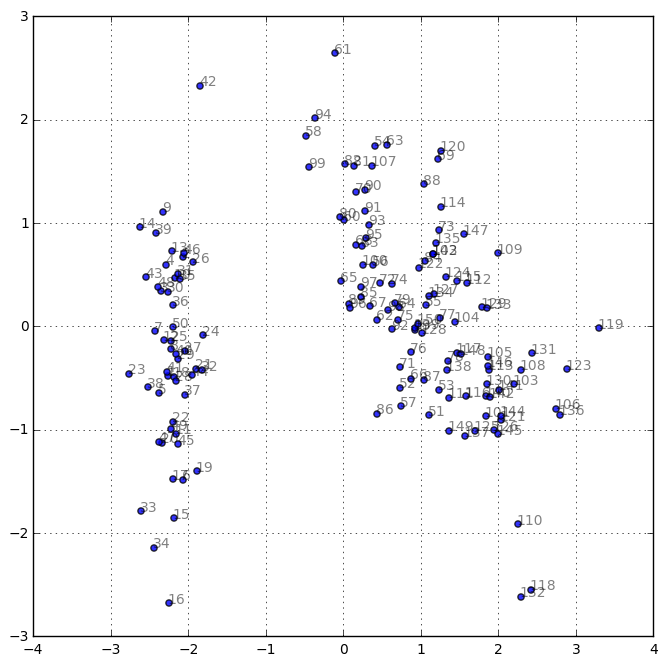

In [9]:
#主成分分析の実行
pca = PCA()
pca.fit(dfs.iloc[:, :])
# データを主成分空間に写像 = 次元圧縮
feature = pca.transform(dfs.iloc[:, :])
# 第一主成分と第二主成分でプロットする
plt.figure(figsize=(8, 8))
for x, y, name in zip(feature[:, 0], feature[:, 1], dfs.index):
    plt.text(x, y, name, alpha=0.5, size=10)
plt.scatter(feature[:, 0], feature[:, 1], alpha=0.8)
plt.grid()
plt.show()

In [10]:
feature_names = df.columns[:-1]
target_names = list(set(df.iloc[:, -1]))
sample_names = df.index
data = df.iloc[:, :-1]
target = df.iloc[:, -1]

In [11]:
from sklearn import cross_validation as cv
train_data, test_data, train_target, test_target = cv.train_test_split(data, target, test_size=0.5)

In [25]:
print(train_data)

     Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
141           6.7          3.1           5.6          2.4
47            5.1          3.8           1.6          0.2
142           6.9          3.1           5.1          2.3
122           5.6          2.8           4.9          2.0
45            5.1          3.8           1.9          0.4
112           6.4          2.7           5.3          1.9
41            5.0          3.5           1.3          0.3
119           7.7          2.6           6.9          2.3
147           6.3          2.5           5.0          1.9
124           6.3          2.7           4.9          1.8
110           7.2          3.6           6.1          2.5
129           6.4          2.8           5.6          2.1
11            5.4          3.7           1.5          0.2
42            4.5          2.3           1.3          0.3
89            5.6          3.0           4.1          1.3
81            5.5          2.4           3.8          1.1
68            

In [16]:
# 様々なパラメータ（ハイパーパラメータという）で学習し、分離性能の最も良いモデルを選択する。
parameters = [
    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]},
    {'kernel': ['rbf'],     'C': [1, 10, 100, 1000], 'gamma': [1e-2, 1e-3, 1e-4]},      
    {'kernel': ['poly'],'C': [1, 10, 100, 1000], 'degree': [2, 3, 4, 5]}]

In [17]:
from sklearn import svm
from sklearn.metrics import accuracy_score
import time
start = time.time()
from sklearn import grid_search

# train_data を使って、SVM による学習を行う
gs = grid_search.GridSearchCV(svm.SVC(), parameters, n_jobs=-1).fit(train_data, train_target)

# 分離性能の最も良かったモデルが何だったか出力する
print(gs.best_estimator_)

# モデル構築に使わなかったデータを用いて、予測性能を評価する
pred_target = gs.predict(test_data)
print ("Accuracy_score:{0}".format(accuracy_score(test_target, pred_target)))
elapsed_time = time.time() - start
print("elapsed_time:{0}".format(elapsed_time))

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.01,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
Accuracy_score:0.9733333333333334
elapsed_time:0.30030393600463867


In [12]:
from sklearn import svm
from sklearn.metrics import accuracy_score
import time
start = time.time()
from sklearn import grid_search

# train_data を使って、SVM による学習を行う
#gs = grid_search.GridSearchCV(svm.SVC(), parameters, n_jobs=2).fit(train_data, train_target)
gs = svm.SVC().fit(train_data, train_target)
# 分離性能の最も良かったモデルが何だったか出力する
#print(gs.best_estimator_)

# モデル構築に使わなかったデータを用いて、予測性能を評価する
pred_target = gs.predict(test_data)
print ("Accuracy_score:{0}".format(accuracy_score(test_target, pred_target)))
elapsed_time = time.time() - start
print("elapsed_time:{0}".format(elapsed_time))

Accuracy_score:0.9333333333333333
elapsed_time:0.00286102294921875


In [13]:
# 予測結果と、本当の答えを比較する
df = pd.DataFrame(columns=['test', 'pred'])
df['test'] = test_target # 本当の答え
df['pred'] = pred_target # 予測された答え
df.T

,28,100,105,108,90,64,143,7,59,141,...,56,20,85,128,44,81,73,61,60,93
test,setosa,versicolor,virginica,virginica,versicolor,versicolor,virginica,setosa,versicolor,virginica,...,versicolor,setosa,versicolor,virginica,setosa,versicolor,versicolor,versicolor,versicolor,versicolor
pred,setosa,versicolor,virginica,virginica,versicolor,versicolor,virginica,setosa,versicolor,virginica,...,versicolor,setosa,versicolor,versicolor,setosa,versicolor,versicolor,versicolor,versicolor,versicolor


In [14]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_target, pred_target)
pd.DataFrame(cm)

,0,1,2
0,27,0,0
1,0,20,1
2,0,4,23


In [28]:
from logging import (getLogger, StreamHandler, INFO, Formatter)

# ログの設定
handler = StreamHandler()
handler.setLevel(INFO)
handler.setFormatter(Formatter("[%(asctime)s] [%(threadName)s] %(message)s"))
logger = getLogger()
logger.addHandler(handler)
logger.setLevel(INFO)


from threading import (Event, Thread)
import time


event = Event()


def event_example1():
    logger.info("スレッド開始")
    event.wait()
    logger.info("スレッド終了")

thread = Thread(target=event_example1)
thread.start()
time.sleep(3)
logger.info("イベント発生")
event.set()

[2017-04-19 16:38:26,313] [Thread-11] スレッド開始
[2017-04-19 16:38:29,317] [MainThread] イベント発生
[2017-04-19 16:38:29,319] [Thread-11] スレッド終了


In [29]:
event = Event()


def event_example2():
    logger.info("スレッド開始")
    while not event.wait(2):
        logger.info("まーだだよ")
    logger.info("スレッド終了")

thread = Thread(target=event_example2)
thread.start()
time.sleep(5)
logger.info("イベント発生")
event.set()

[2017-04-19 16:39:51,563] [Thread-12] スレッド開始
[2017-04-19 16:39:53,570] [Thread-12] まーだだよ
[2017-04-19 16:39:55,574] [Thread-12] まーだだよ
[2017-04-19 16:39:56,564] [MainThread] イベント発生
[2017-04-19 16:39:56,566] [Thread-12] スレッド終了
